In [1]:
import os
import sys
sys.path.append(os.getcwd() + '\\..')
import pandas as pd
from data.raw_data import *

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [3]:
train_df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
id              153164 non-null object
comment_text    153164 non-null object
dtypes: object(2)
memory usage: 2.3+ MB


In [5]:
test_df.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [6]:
label_columns = [x for x in train_df.columns if x not in['id', 'comment_text']]

In [9]:
for label in label_columns:
    print(f"Count for {label}: {train_df[label].sum()/159571}")

Count for toxic: 0.09584448302009764
Count for severe_toxic: 0.009995550569965721
Count for obscene: 0.052948217407925
Count for threat: 0.002995531769557125
Count for insult: 0.04936360616904074
Count for identity_hate: 0.00880485802558109


In [11]:
import re
def remove_punctuation(row_str):
    return re.sub(r"\W", " ", row_str)

In [14]:
train_df = train_df.assign(comment_text=train_df.comment_text.apply(remove_punctuation))

In [15]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,D aww He matches this background colour I m s...,0,0,0,0,0,0
2,000113f07ec002fd,Hey man I m really not trying to edit war It...,0,0,0,0,0,0
3,0001b41b1c6bb37e,More I can t make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,You sir are my hero Any chance you remember...,0,0,0,0,0,0


In [16]:
train_df = train_df.assign(comment_len=train_df.comment_text.str.len())

In [18]:
deciles = [x/10.0 for x in range(1, 10)]
train_df.comment_len.describe(percentiles=deciles)

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
10%          47.000000
20%          78.000000
30%         114.000000
40%         155.000000
50%         205.000000
60%         274.000000
70%         367.000000
80%         528.000000
90%         889.000000
max        5000.000000
Name: comment_len, dtype: float64

In [20]:
for label in label_columns:
    print("Correlation with comment length for {}: {}".format(label, train_df[label].corr(train_df.comment_len)))

Correlation with comment length for toxic: -0.05447006083163078
Correlation with comment length for severe_toxic: 0.010131476097346773
Correlation with comment length for obscene: -0.0429448445095561
Correlation with comment length for threat: -0.008010929142591652
Correlation with comment length for insult: -0.045052164589184276
Correlation with comment length for identity_hate: -0.013646811898123098


In [21]:
def get_num_words(row_str):
    return len(row_str.split())

In [22]:
train_df = train_df.assign(num_words=train_df.comment_text.apply(get_num_words))

In [24]:
train_df.num_words.describe(percentiles=deciles)

count    159571.000000
mean         69.176812
std         102.199498
min           1.000000
10%           8.000000
20%          14.000000
30%          21.000000
40%          28.000000
50%          37.000000
60%          49.000000
70%          65.000000
80%          93.000000
90%         156.000000
max        1403.000000
Name: num_words, dtype: float64

In [25]:
def get_unique_words(row_str):
    return len(set(row_str.lower().split()))

In [26]:
train_df = train_df.assign(unique_words=train_df.comment_text.apply(get_unique_words))

In [27]:
train_df.unique_words.describe(percentiles=deciles)

count    159571.000000
mean         45.559249
std          48.413661
min           1.000000
10%           8.000000
20%          13.000000
30%          18.000000
40%          24.000000
50%          31.000000
60%          39.000000
70%          50.000000
80%          66.000000
90%          98.000000
max         551.000000
Name: unique_words, dtype: float64

In [28]:
for label in label_columns:
    print("Correlation with number of words for {}: {}".format(label, train_df[label].corr(train_df.num_words)))

Correlation with number of words for toxic: -0.0505603514155355
Correlation with number of words for severe_toxic: 0.01059871603759936
Correlation with number of words for obscene: -0.03990540553491677
Correlation with number of words for threat: -0.006349151044919374
Correlation with number of words for insult: -0.04158970848893047
Correlation with number of words for identity_hate: -0.013741014897643566


In [29]:
for label in label_columns:
    print("Correlation with unique words for {}: {}".format(label, train_df[label].corr(train_df.unique_words)))

Correlation with unique words for toxic: -0.09894807559708929
Correlation with unique words for severe_toxic: -0.050632568513852706
Correlation with unique words for obscene: -0.08331065036354922
Correlation with unique words for threat: -0.020910868879782177
Correlation with unique words for insult: -0.08333459851941347
Correlation with unique words for identity_hate: -0.03378064011201142


In [30]:
train_df.eval('mean_word_length = comment_len/num_words', inplace=True)

In [31]:
train_df.mean_word_length.describe(percentiles=deciles)

count    159571.000000
mean          5.727259
std           5.620545
min           1.916667
10%           4.865385
20%           5.133333
30%           5.314286
40%           5.466667
50%           5.604651
60%           5.750000
70%           5.904762
80%           6.117647
90%           6.490566
max        1242.250000
Name: mean_word_length, dtype: float64

In [32]:
train_df.mean_word_length.quantile(0.99)

8.4

In [33]:
for label in label_columns:
    print("Correlation with unique words for {}: {}".format(label, train_df[label].corr(train_df.mean_word_length)))

Correlation with unique words for toxic: 0.004497060027850679
Correlation with unique words for severe_toxic: 0.012127401264922786
Correlation with unique words for obscene: 0.001174266458933062
Correlation with unique words for threat: -0.004789504349835799
Correlation with unique words for insult: 0.003688024796914667
Correlation with unique words for identity_hate: 0.01994607560254739


In [34]:
train_df['sum'] = train_df['toxic'] + train_df["severe_toxic"] + train_df['obscene'] + train_df['threat'] + train_df['insult'] + train_df['identity_hate']

In [36]:
train_df[label_columns + ['sum']].corr()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,0.869050
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.517967
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,0.879731
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,0.251314
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,0.869177
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,0.448341
sum,0.869050,0.517967,0.879731,0.251314,0.869177,0.448341,1.000000


In [38]:
train_df['toxicity_label']=(train_df==1).any(axis=1)

In [39]:
toxic_count = train_df['toxicity_label'].value_counts()

In [40]:
toxic_count

False    143315
True      16256
Name: toxicity_label, dtype: int64

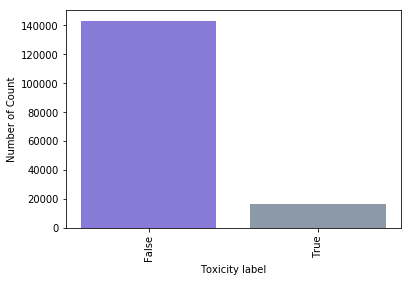

In [43]:
import matplotlib.pyplot as plt
x = [0,1]
ind = toxic_count.index
plt.bar(toxic_count.index, toxic_count.values, alpha=0.8, color=['slateblue', 'slategrey'])
plt.ylabel('Number of Count', fontsize=10)
plt.xlabel('Toxicity label', fontsize=10)
plt.xticks(x,ind,rotation='vertical')
plt.show()

In [47]:
pd.crosstab(train_df.toxic, [train_df.obscene, train_df.threat, train_df.insult, train_df.identity_hate])

obscene             0                                    1                     \
threat              0                    1               0                  1   
insult              0          1         0      1        0         1        0   
identity_hate       0    1     0    1    0  1   0  1     0   1     0    1   0   
toxic                                                                           
0              143346   54   301   28   22  0   3  0   317   3   181   18   2   
1                5707  139  1229  141  124  8  17  3  1916  41  4789  883  15   

obscene                 
threat                  
insult           1      
identity_hate    0   1  
toxic                   
0                2   0  
1              195  87

In [49]:
pd.crosstab(train_df.severe_toxic, [train_df.obscene, train_df.threat, train_df.insult, train_df.identity_hate])

obscene             0                                    1                     \
threat              0                    1               0                  1   
insult              0          1         0      1        0         1        0   
identity_hate       0    1     0    1    0  1   0  1     0   1     0    1   0   
severe_toxic                                                                    
0              149012  190  1516  162  135  7  19  3  2075  38  3981  636  13   
1                  41    3    14    7   11  1   1  0   158   6   989  265   4   

obscene                 
threat                  
insult           1      
identity_hate    0   1  
severe_toxic            
0              133  56  
1               64  31

In [50]:
pd.crosstab(train_df.toxic, [train_df.severe_toxic])

severe_toxic,0,1
toxic,,
0,144277,0
1,13699,1595


In [51]:
train_df[train_df.comment_text.isnull()]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_len,num_words,unique_words,mean_word_length,sum,toxicity_label


In [52]:
train_df[train_df.comment_text == '']

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_len,num_words,unique_words,mean_word_length,sum,toxicity_label


In [53]:
train_df = train_df.sort_values(by="comment_len", ascending=False)

In [54]:
pd.set_option('display.max_colwidth', -1)

In [55]:
train_df.comment_text.head(1)

46583    hahahahahahahahahahahahahahahahahaha vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism 

In [56]:
train_df.comment_text.head(10)

46583     hahahahahahahahahahahahahahahahahaha vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism

In [57]:
train_df.head(10)

id  \
46583   7c7a4bf4c84fe002   
47715   7f79fd5eacbe804c   
74753   c7f72686bf613e4e   
42061   70368dd072aebb42   
72192   c14532e93d456260   
75165   c91d629c6599bb23   
56834   97e695cfd71944ed   
46197   7b6b88051eb69303   
131729  c0e076f0011acaa6   
128782  b0b8f1eaa83616fe   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [60]:
import numpy as np
one_percent = int(np.ceil(train_df.shape[0] / 100))

In [61]:
one_percent

1596

In [62]:
train_sub = train_df.iloc[0:one_percent, :]

In [63]:
train_sub.toxic.value_counts()

0    1390
1    206 
Name: toxic, dtype: int64

In [64]:
train_df = train_df.sort_values(by='toxic', ascending=False)

In [65]:
train_df.head()

id  \
46583   7c7a4bf4c84fe002   
14688   26c121f84d05943e   
116560  6f1ad48eb2f2719c   
17452   2e0f60bf77130180   
147383  3b908aea8c5826d0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
vectorizer = TfidfVectorizer(stop_words='english')

In [69]:
vectorizer.fit(train_df.comment_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [71]:
X = vectorizer.transform(train_df.comment_text)

In [72]:
X_toxic = X[0:9237, :]

In [73]:
means = np.asarray(np.mean(X_toxic, axis=0))
top_ten = np.argsort(-means)[:10]

In [74]:
for ind in range(10):
    print(ind + 1, ":", vectorizer.get_feature_names()[top_ten[0, ind]])

1 : fuck
2 : fucking
3 : shit
4 : like
5 : don
6 : stupid
7 : just
8 : wikipedia
9 : stop
10 : ass
